In [104]:
import pandas as pd
import numpy as np
# Load libraries
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

import pandas as pd
import numpy as np
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [105]:
# check version number
import imblearn
print(imblearn.__version__)

0.8.0


In [106]:
data_jamu = pd.read_csv("formulaJamuMetabolite_filtered_SVM_rbf.csv")
del data_jamu['Unnamed: 0']
data_jamu.head(2)

,C1,C2,C4,C5,C6,C7,C8,C9,C10,C11,...,C3480,C3482,C3483,C3484,C3486,C3487,C3488,C3489,C3490,label update
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6


In [107]:
data_jamu["label update"].value_counts()

3    169
4     72
6     53
2     48
1      4
Name: label update, dtype: int64

Counter({2: 169, 3: 72, 4: 53, 1: 48, 0: 4})
Class=4, n=53 (15.318%)
Class=3, n=72 (20.809%)
Class=0, n=4 (1.156%)
Class=1, n=48 (13.873%)
Class=2, n=169 (48.844%)


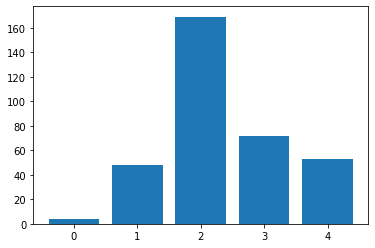

In [108]:
y_jamu = data_jamu.iloc[:,2255:]
temp = LabelEncoder()
y = temp.fit_transform(y_jamu)
#summarize distribution
counter = Counter(y)
print(counter)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [109]:
temp.inverse_transform([0, 1, 2, 3, 4])

array([1, 2, 3, 4, 6], dtype=int64)

In [110]:
data_jamu["label update"].value_counts()

3    169
4     72
6     53
2     48
1      4
Name: label update, dtype: int64

In [111]:
# sampling SMOTE according to class distribution

x = data_jamu.iloc[:, :2255]
y = data_jamu.iloc[:,2255:]
temp = LabelEncoder()
y = temp.fit_transform(y)

In [112]:
temp.inverse_transform([0, 1, 2, 3, 4])

array([1, 2, 3, 4, 6], dtype=int64)

In [113]:
from imblearn.over_sampling import SMOTE
strategy = {0:200, 1:200, 2:200, 3:300, 4:300}
oversample = SMOTE(sampling_strategy=strategy, k_neighbors=2)

In [114]:
x, y = oversample.fit_resample(x, y)
x = pd.DataFrame(x)
y = pd.DataFrame(y)

## oversampling SMOTE according to destribution class label, RF

In [153]:
raw = pd.DataFrame(x)
raw['label'] = y

In [125]:
# x['label'] = y
# x.to_csv('data_formula_Jamu_filteredSVM_rbf_SMOTE9Spet.csv')

In [140]:
del x['label']

In [137]:
# x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3)

In [138]:
temp_model = []
akurasi = []
recall = []
precision = []

In [90]:
# random forest test set
from sklearn.model_selection import RepeatedStratifiedKFold
seed = 7
kf = RepeatedStratifiedKFold(n_splits=10, random_state=seed, n_repeats=1)
val_acc_cv = []
j = 0
for train_index, test_index in kf.split(x,y):
    j+=1
    print(f"Fold {j} :")
    X_train,X_test = x.iloc[train_index],x.iloc[test_index]
    y_train,y_test = y.iloc[train_index],y.iloc[test_index]
    
    # Instantiate model
    #Create a Gaussian Classifier
    model = RandomForestClassifier(n_estimators=1000, n_jobs=-1, max_features="sqrt", max_depth=110, bootstrap=True, min_samples_split=2, min_samples_leaf=1)
    model.fit(X_train, y_train)
    
    temp_model.append(model)
    #Import scikit-learn metrics module for accuracy calculation
    val_acc_cv.append(round(model.score(X_test, y_test), 4)*100)
    print('Accuracy:',round(model.score(X_test, y_test), 4)*100, '%')
    
    predict = model.predict(X_test)
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import precision_score
    acc_score = accuracy_score(y_test,predict)
    recall_score = recall_score(y_test,predict, average = 'weighted')
    precision_score = precision_score(y_test,predict, average = 'weighted')
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, predict)
    print(cm)
    print("Akurasi")
    print(acc_score)
    print("Recall")
    print(recall_score)
    print("Precision") 
    print(precision_score)
    print("")
    akurasi.append(acc_score)
    recall.append(recall_score)
    precision.append(precision_score)

Fold 1 :
Accuracy: 92.5 %
[[20  0  0  0  0]
 [ 0 19  0  0  1]
 [ 1  1 18  0  0]
 [ 1  0  0 28  1]
 [ 2  0  0  2 26]]
Akurasi
0.925
Recall
0.925
Precision
0.9293650793650794

Fold 2 :
Accuracy: 90.83 %
[[20  0  0  0  0]
 [ 0 20  0  0  0]
 [ 1  0 18  1  0]
 [ 0  0  1 28  1]
 [ 3  0  0  4 23]]
Akurasi
0.9083333333333333
Recall
0.9083333333333333
Precision
0.9151548378522063

Fold 3 :
Accuracy: 95.83 %
[[20  0  0  0  0]
 [ 0 20  0  0  0]
 [ 0  0 19  0  1]
 [ 0  0  0 30  0]
 [ 4  0  0  0 26]]
Akurasi
0.9583333333333334
Recall
0.9583333333333334
Precision
0.962962962962963

Fold 4 :
Accuracy: 93.33 %
[[20  0  0  0  0]
 [ 0 19  0  0  1]
 [ 0  2 18  0  0]
 [ 0  0  0 29  1]
 [ 2  0  0  2 26]]
Akurasi
0.9333333333333333
Recall
0.9333333333333333
Precision
0.9349892938602616

Fold 5 :
Accuracy: 89.17 %
[[20  0  0  0  0]
 [ 0 19  0  0  1]
 [ 0  0 18  2  0]
 [ 0  0  1 28  1]
 [ 6  1  1  0 22]]
Akurasi
0.8916666666666667
Recall
0.8916666666666667
Precision
0.8990384615384616

Fold 6 :
Accuracy: 93.3

In [91]:
summary_result = pd.DataFrame()
summary_result['Accuracy_Best_Parameter'] = akurasi
summary_result['Recall_Best_Parameter'] = recall
summary_result['Precision_Best_Parameter'] = precision

In [132]:
model = temp_model[9]

In [143]:
# search important metabolite

from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
import eli5
from eli5.sklearn import PermutationImportance

In [144]:
perm = PermutationImportance(model).fit(x, y)
feature_importance_model = eli5.show_weights(perm)

In [145]:
explanation = eli5.formatters.as_dataframe.explain_weights_df(perm,feature_names = x.columns.tolist(),)

In [146]:
explanation.to_excel('featureImportance_rf_formulaJamu_filteredSVMrbf_Smote.xlsx')

In [147]:
explanation

,feature,weight,std
0,C3126,0.00,0.00
1,C1281,0.00,0.00
2,C3238,0.00,0.00
3,C1958,0.00,0.00
4,C1048,0.00,0.00
...,...,...,...
2250,C1655,-0.00,0.00
2251,C1780,-0.00,0.00
2252,C326,-0.00,0.00
2253,C1514,-0.00,0.00


In [156]:
raw['label'].value_counts()

4    300
3    300
2    200
1    200
0    200
Name: label, dtype: int64

In [148]:
VI = pd.read_excel('featureImportance_rf_formulaJamu_filteredSVMrbf_Smote.xlsx')
del VI['Unnamed: 0']

In [159]:
for i in range(0,5):
    VI[i] = 0

In [161]:
for i in range(len(VI)):
    uniq = raw['label'][raw[(VI['feature'].iloc[i])] == 1].unique()
    print(uniq)
    for j in uniq:
        j = str(j)
        if (len(j.split(',')) == 1):
            if (int(j) !=0):
                VI[int(j)].iloc[i] = 1

[4 3 2 1]
[4 3 2 1]
[4 3 2 1]
[4 3 2 1]
[3 2 1]
[3 2 1]
[4 3 2 1]
[4 3 1 0 2]
[4 0 3 2 1]
[4 0 3 2 1]
[4 3 0 2 1]
[3 2 1]
[3 2 1]
[3 2 1]
[4 3 2 1]
[2 3]
[4 3 1 2]
[4 3 2 1]
[4 3 0 1 2]
[4 3 2]
[4 3 2]
[2 3]
[2]
[4 3 1 2]
[4 2]
[0 3 2 4 1]
[0 3 2 4 1]
[2]
[4 3 1]
[2]
[2]
[4]
[2]
[1]
[4 3 2 1]
[2 4 1]
[3 2 4 1]
[4]
[2]
[3 2 4]
[1]
[3 2 4 1]
[1]
[4 3 2 1]
[1]
[2 1]
[2 1]
[3 4]
[4 3 1]
[4 3 0 2 1]
[4 3 0 2 1]
[3]
[3]
[3]
[3]
[3]
[2 4 1 3]
[2]
[3 0 2 4 1]
[3]
[4 2 3]
[4 2]
[2]
[4 2 3]
[4 3 1 2]
[3 2 4 1]
[4 3 2 1]
[2 4]
[1 2]
[2]
[2]
[2]
[4 3 2 1]
[3 1 2 4]
[4 3 2 1]
[2]
[3 2 1]
[3 2 1]
[4 2 1]
[4 3 2 1]
[4 2 3]
[3 2 1]
[2 4]
[]
[4 3]
[4 0 3 2]
[1]
[4 3 2]
[0 4 1]
[3]
[4 3 2 1]
[3 2 4 1]
[4 3 2 1]
[1]
[4]
[2]
[4 2 1]
[4 2 1]
[4 3 1 2]
[4 3 1 2]
[4]
[4 3 2 1]
[3 4]
[3 4]
[3 4]
[2]
[1]
[3 2 1]
[3 2 1]
[3 2 4 1]
[2]
[4]
[2 3]
[2]
[2]
[4]
[1]
[2 4 1 3]
[1 2]
[4 2 3]
[4 3 1 2]
[3 2 1]
[2]
[1 2]
[4 2]
[4 2]
[1 2]
[3 2 4 1]
[4 3 2 1]
[3 2 4 1]
[4 3 1 2]
[4 2]
[3 2 1]
[3 2 4 1]
[2]
[3]
[2]
[2]
[4 

[2 4]
[4 2 1]
[1]
[2]
[4 3 2 1]
[1]
[4]
[4]
[2]
[4]
[2 4]
[4 1]
[4 3 2 1]
[3 2 4 1]
[4 3 0 1 2]
[4 1 3]
[2 4]
[2 4]
[2 4]
[2 4]
[2 4]
[2 4]
[2 4]
[2 4]
[2 1 3]
[4 3 2 1]
[3]
[0 1]
[2]
[2]
[2]
[4 3]
[4 2 1 3]
[4 2 3]
[4 3 1]
[1]
[1]
[4 3 1 2]
[4 3 2 1]
[0 1]
[3]
[2 3]
[4]
[4]
[4 0 3 2]
[2]
[1]
[3]
[3 1 2 4]
[4 3 2 1]
[4 3 2 1]
[3 2 1]
[2]
[2 3]
[4]
[2]
[3 2 1]
[4 1]
[4 3 2 1]
[2 3]
[3]
[2 3]
[3 2 4 1]
[2]
[4 3 2]
[2 4 3]
[4 3 2 1]
[4 3 2 1]
[4 2]
[4 2]
[4 2]
[3 1]
[3 1]
[0 3 2 4 1]
[4 3 1 2]
[3 2 4 1]
[3 2 4 1]
[2]
[1]
[3]
[3]
[3]
[3]
[2]
[2]
[4 3 2 1]
[4 3 1]
[4 3 1]
[4 3 2 1]
[4 3 2 1]
[4]
[3 2 4 1]
[2 4]
[0 3 2 1]
[2 3]
[3]
[3 2 1]
[2]
[2]
[1]
[2]
[4 3 1 2]
[2 1]
[3 2 1]
[0 3 4 2 1]
[1 3]
[0 3 4 2 1]
[0 3 4 2 1]
[3 2 1]
[4]
[4 1]
[3 0 2 4 1]
[4 2]
[3]
[3 2 1]
[0 3 2 1]
[4 0 3 2]
[3 2 4 1]
[2]
[4]
[4]
[4 3 1 2]
[4 1 3]
[4 3 1 2]
[2 3]
[4 1 3]
[4 1 3]
[1]
[0 3 4 2 1]
[3 2 4 1]
[2]
[4]
[2]
[2]
[4 3 1 2]
[1]
[4 3 1 2]
[1 2]
[0 3 4 2 1]
[4 3 1 2]
[3 2 4 1]
[1 3]
[2 4 1]
[4 3 2 1]
[3 2 4 1

In [163]:
VI.to_excel("HasilMetaboliteImportant_filteredSVM_RBV_SMOTE.xlsx")

In [94]:
# tuning paramter RF
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 20]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 5, 10]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10, 15, 20], 'min_samples_leaf': [1, 2, 4, 5, 10], 'bootstrap': [True, False]}


In [95]:
from sklearn.ensemble import RandomForestRegressor
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(x, y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 15.6min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [115]:
rf_random.best_params_

{'n_estimators': 1200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 100,
 'bootstrap': False}

In [116]:
temp_model = []
akurasi = []
recall = []
precision = []

In [117]:
# random forest test set
from sklearn.model_selection import RepeatedStratifiedKFold
seed = 7
kf = RepeatedStratifiedKFold(n_splits=10, random_state=seed, n_repeats=1)
val_acc_cv = []
j = 0
for train_index, test_index in kf.split(x,y):
    j+=1
    print(f"Fold {j} :")
    X_train,X_test = x.iloc[train_index],x.iloc[test_index]
    y_train,y_test = y.iloc[train_index],y.iloc[test_index]
    
    # Instantiate model
    #Create a Gaussian Classifier
    model = RandomForestClassifier(n_estimators=1200, n_jobs=-1, max_features="sqrt", max_depth=100, bootstrap=False, min_samples_split=2, min_samples_leaf=2)
    model.fit(X_train, y_train)
    
    temp_model.append(model)
    #Import scikit-learn metrics module for accuracy calculation
    val_acc_cv.append(round(model.score(X_test, y_test), 4)*100)
    print('Accuracy:',round(model.score(X_test, y_test), 4)*100, '%')
    
    predict = model.predict(X_test)
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import precision_score
    acc_score = accuracy_score(y_test,predict)
    recall_score = recall_score(y_test,predict, average = 'weighted')
    precision_score = precision_score(y_test,predict, average = 'weighted')
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, predict)
    print(cm)
    print("Akurasi")
    print(acc_score)
    print("Recall")
    print(recall_score)
    print("Precision") 
    print(precision_score)
    print("")
    akurasi.append(acc_score)
    recall.append(recall_score)
    precision.append(precision_score)

Fold 1 :
Accuracy: 95.0 %
[[20  0  0  0  0]
 [ 0 20  0  0  0]
 [ 1  0 19  0  0]
 [ 0  0  0 30  0]
 [ 2  0  0  3 25]]
Akurasi
0.95
Recall
0.95
Precision
0.9555335968379447

Fold 2 :
Accuracy: 90.83 %
[[20  0  0  0  0]
 [ 0 20  0  0  0]
 [ 1  1 16  2  0]
 [ 0  0  1 29  0]
 [ 4  0  0  2 24]]
Akurasi
0.9083333333333333
Recall
0.9083333333333333
Precision
0.918623206858501

Fold 3 :
Accuracy: 96.67 %
[[20  0  0  0  0]
 [ 0 20  0  0  0]
 [ 0  1 19  0  0]
 [ 0  0  1 29  0]
 [ 2  0  0  0 28]]
Akurasi
0.9666666666666667
Recall
0.9666666666666667
Precision
0.9685786435786435

Fold 4 :
Accuracy: 92.5 %
[[20  0  0  0  0]
 [ 0 19  0  0  1]
 [ 0  2 16  2  0]
 [ 0  0  0 30  0]
 [ 3  0  0  1 26]]
Akurasi
0.925
Recall
0.925
Precision
0.9304013217056695

Fold 5 :
Accuracy: 92.5 %
[[20  0  0  0  0]
 [ 0 20  0  0  0]
 [ 0  0 19  1  0]
 [ 0  0  1 27  2]
 [ 1  0  1  3 25]]
Akurasi
0.925
Recall
0.925
Precision
0.9254138931558288

Fold 6 :
Accuracy: 91.67 %
[[19  0  0  0  1]
 [ 0 20  0  0  0]
 [ 0  0 19  1  0

In [118]:
summary_result = pd.DataFrame()
summary_result['Accuracy_Best_Parameter'] = akurasi
summary_result['Recall_Best_Parameter'] = recall
summary_result['Precision_Best_Parameter'] = precision

In [119]:
summary_result

,Accuracy_Best_Parameter,Recall_Best_Parameter,Precision_Best_Parameter
0,0.95,0.95,0.96
1,0.91,0.91,0.92
2,0.97,0.97,0.97
3,0.93,0.93,0.93
4,0.93,0.93,0.93
5,0.92,0.92,0.92
6,0.93,0.93,0.93
7,0.94,0.94,0.94
8,0.92,0.92,0.92
9,0.97,0.97,0.97


In [121]:
summary_result.describe()

,Accuracy_Best_Parameter,Recall_Best_Parameter,Precision_Best_Parameter
count,10.00,10.00,10.00
mean,0.93,0.93,0.94
std,0.02,0.02,0.02
min,0.91,0.91,0.92
25%,0.92,0.92,0.92
50%,0.93,0.93,0.93
75%,0.95,0.95,0.95
max,0.97,0.97,0.97


In [120]:
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from tensorflow import keras
from keras.models import Sequential
#from keras.optimizers import SGD, RMSprop, Adam
from keras.layers import Dense, Activation, Dropout
from sklearn.model_selection import StratifiedKFold